In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
import os
os.chdir("C:/Users/PraveenGupta/Downloads/Hackathon/05_28_Mini Hack/")

In [3]:
data = pd.read_csv('Train_KQyJ5eh.csv')
print data.head()
print '\n Data Types:'
print data.dtypes

       Date  Number_SKU_Sold
0  1-Jan-07            31762
1  2-Jan-07           285955
2  3-Jan-07           740781
3  4-Jan-07           508796
4  5-Jan-07           445951

 Data Types:
Date               object
Number_SKU_Sold     int64
dtype: object


In [9]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%b-%y')
data = pd.read_csv('Train_KQyJ5eh.csv', parse_dates='Date', index_col='Date',date_parser=dateparse)
print data.head()

            Number_SKU_Sold
Date                       
2007-01-01            31762
2007-01-02           285955
2007-01-03           740781
2007-01-04           508796
2007-01-05           445951


In [11]:
data.index

DatetimeIndex(['2007-01-01', '2007-01-02', '2007-01-03', '2007-01-04',
               '2007-01-05', '2007-01-06', '2007-01-09', '2007-01-11',
               '2007-01-12', '2007-01-13',
               ...
               '2008-12-15', '2008-12-16', '2008-12-17', '2008-12-18',
               '2008-12-19', '2008-12-20', '2008-12-21', '2008-12-22',
               '2008-12-23', '2008-12-24'],
              dtype='datetime64[ns]', name=u'Date', length=587, freq=None)

In [13]:
ts = data['Number_SKU_Sold'] 
ts.head(10)

Date
2007-01-01     31762
2007-01-02    285955
2007-01-03    740781
2007-01-04    508796
2007-01-05    445951
2007-01-06    347351
2007-01-09    269415
2007-01-11    286603
2007-01-12    334356
2007-01-13    137819
Name: Number_SKU_Sold, dtype: int64

In [14]:
ts['2007-01-01']

31762

In [15]:
from datetime import datetime
ts[datetime(2007,1,1)]

31762

In [16]:
ts['2007-01-01':'2007-01-13']

Date
2007-01-01     31762
2007-01-02    285955
2007-01-03    740781
2007-01-04    508796
2007-01-05    445951
2007-01-06    347351
2007-01-09    269415
2007-01-11    286603
2007-01-12    334356
2007-01-13    137819
Name: Number_SKU_Sold, dtype: int64

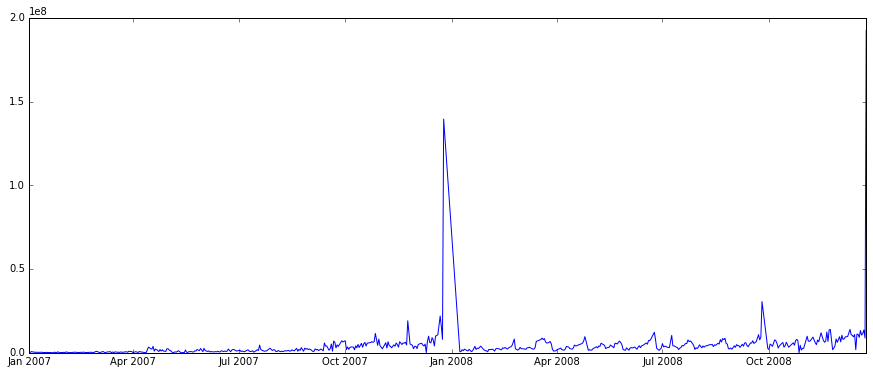

In [20]:
plt.plot(ts)

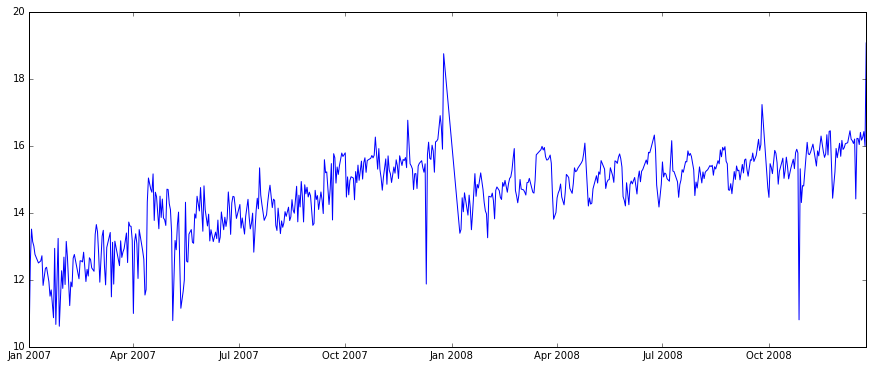

In [22]:
ts_log=np.log(ts)
plt.plot(ts_log)

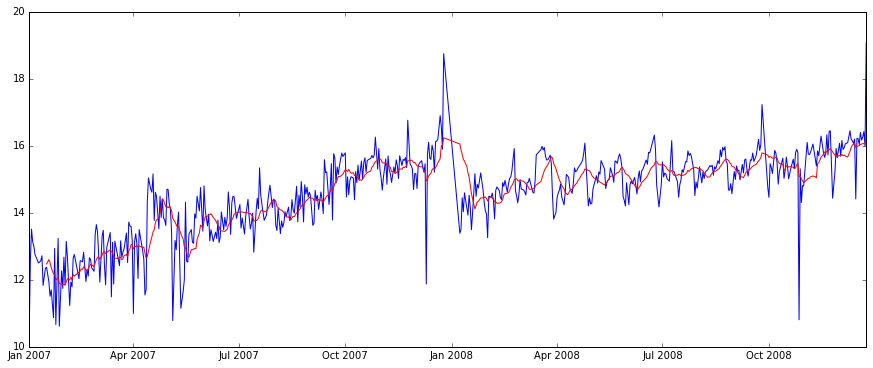

In [23]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [24]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Date
2007-01-01         NaN
2007-01-02         NaN
2007-01-03         NaN
2007-01-04         NaN
2007-01-05         NaN
2007-01-06         NaN
2007-01-09         NaN
2007-01-11         NaN
2007-01-12         NaN
2007-01-13         NaN
2007-01-15         NaN
2007-01-16   -0.098381
Name: Number_SKU_Sold, dtype: float64

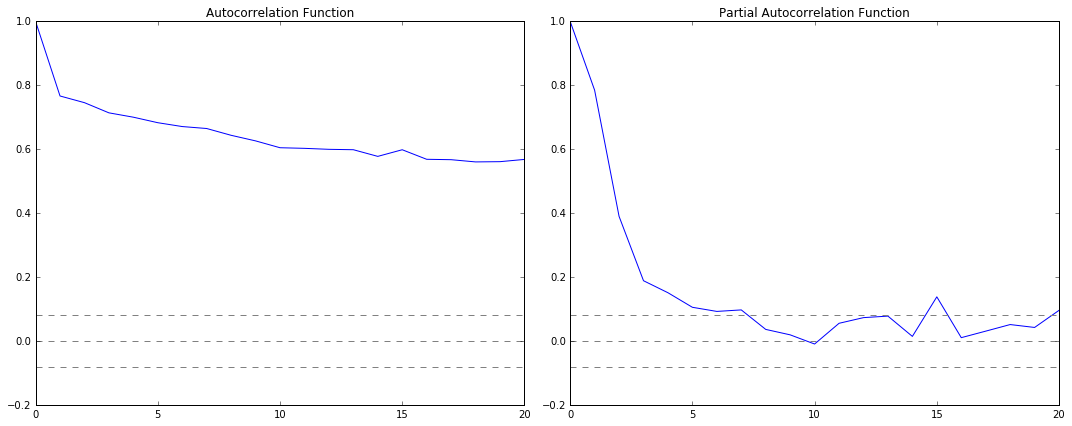

In [26]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log, nlags=20)
lag_pacf = pacf(ts_log, nlags=20, method='ols')

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

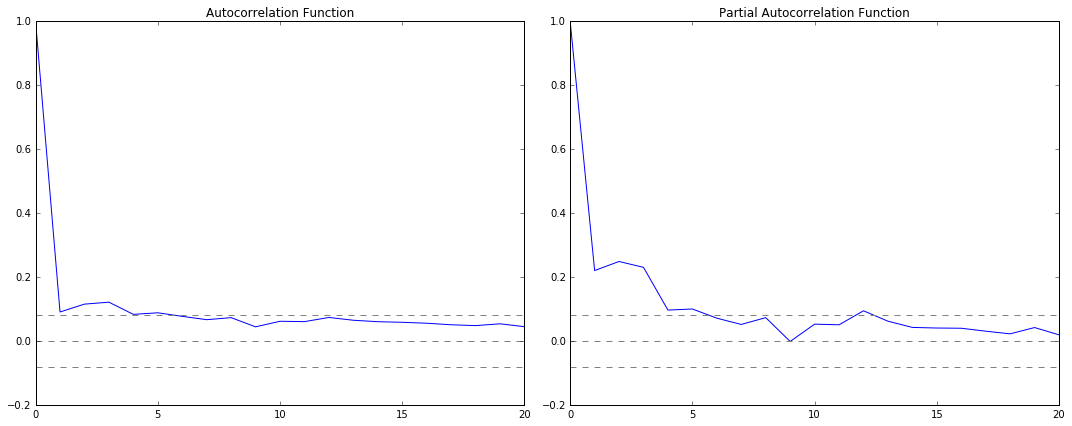

In [27]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts, nlags=20)
lag_pacf = pacf(ts, nlags=20, method='ols')

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

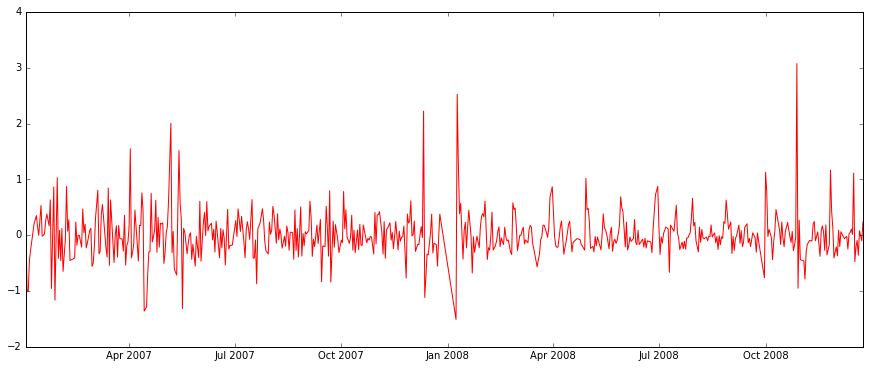

In [31]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log, order=(4, 1, 0))  
results_AR = model.fit()#disp=-1)  
# plt.plot(ts_log_dif)
plt.plot(results_AR.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

In [8]:
# Rough
pd.datetime.strptime('1-Jan-07', '%d-%b-%y')

datetime.datetime(2007, 1, 1, 0, 0)

In [43]:
svdata

,Date,Number_SKU_Sold,xxDate,month
0,1-Jan-07,31762,2007-01-01,1
1,2-Jan-07,285955,2007-01-02,1
2,3-Jan-07,740781,2007-01-03,1
3,4-Jan-07,508796,2007-01-04,1
4,5-Jan-07,445951,2007-01-05,1
5,6-Jan-07,347351,2007-01-06,1
6,9-Jan-07,269415,2007-01-09,1
7,11-Jan-07,286603,2007-01-11,1
8,12-Jan-07,334356,2007-01-12,1
9,13-Jan-07,137819,2007-01-13,1


In [40]:
svdata = pd.read_csv('Train_KQyJ5eh.csv', parse_dates='Date',date_parser=dateparse)

In [41]:
svdata["xxDate"] = (pd.to_datetime(svdata["Date"], format="%d-%b-%y"))

In [42]:
svdata['month']=svdata['xxDate'].apply(lambda x:x.month)
svdata['DayOfMont']=svdata['xxDate'].apply(lambda x:x.month)
svdata['month']=svdata['xxDate'].apply(lambda x:x.month)
